In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

In [26]:
target_data = pd.read_csv("/Users/rubenstark/Documents/GitHub/Its-Wekk/4 - Data/Final_Data/Cleaned/10Targcleaned.csv")

In [24]:
print(target_data.head(10))

                 Datum  PM10 (Stundenmittelwerte)  PM2.5 (Stundenmittelwerte)
0  2022-01-01 00:00:00                     83.840                      71.870
1  2022-01-01 01:00:00                     91.973                      78.909
2  2022-01-01 02:00:00                     68.396                      58.632
3  2022-01-01 03:00:00                     49.625                      42.563
4  2022-01-01 04:00:00                     41.854                      35.799
5  2022-01-01 05:00:00                     26.567                      23.427
6  2022-01-01 06:00:00                     22.751                      20.195
7  2022-01-01 07:00:00                     20.480                      18.254
8  2022-01-01 08:00:00                     19.744                      17.514
9  2022-01-01 09:00:00                     18.959                      16.620


# Seris geplotted

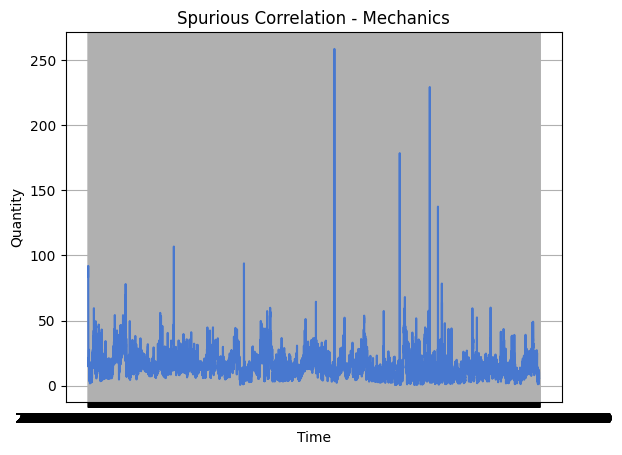

In [9]:

#Series 1

# Plotting the time series

fig, ax = plt.subplots()
ax.plot(target_data["Datum"], target_data["PM10 (Stundenmittelwerte)"], label="A")
ax.set_xlabel("Time")
ax.set_ylabel("Quantity")
ax.set_title("Spurious Correlation - Mechanics")
ax.grid()

# Components geplotted

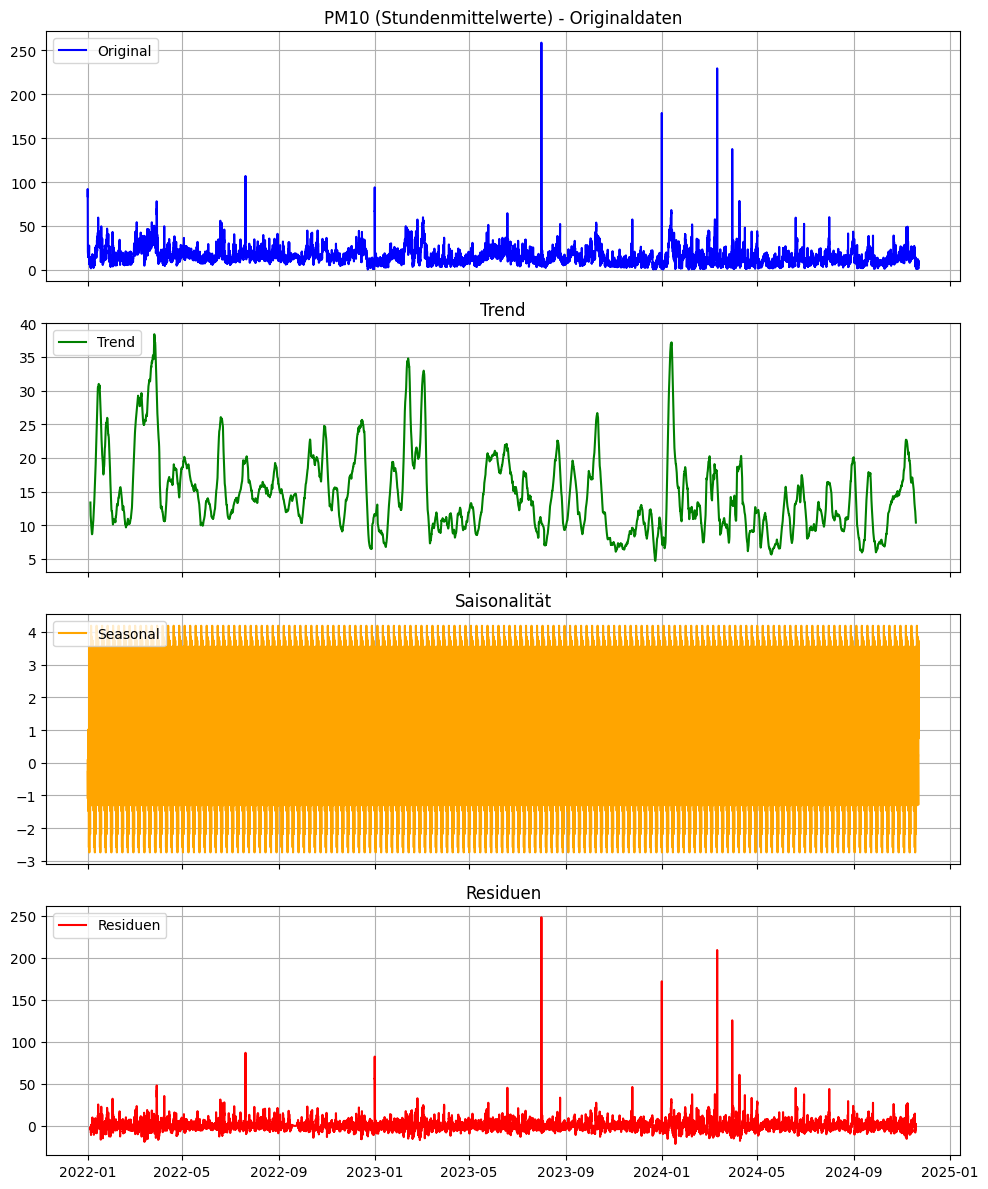

In [25]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Sicherstellen, dass der 'Datum'-Spalte ein datetime-Format hat und als Index gesetzt wird
target_data['Datum'] = pd.to_datetime(target_data['Datum'])
target_data.set_index('Datum', inplace=True)

# Saisonalität basierend auf stündlichen Daten (falls vorhanden)
# Für PM10 Mittelwerte (du kannst das für PM2.5 wiederholen)
series = target_data['PM10 (Stundenmittelwerte)']

# Frequenz (z.B. daily, hourly): Anpassung je nach Datensatz
#result = seasonal_decompose(series, model='additive', period=24)  # Für tägliche Saisonalität
result = seasonal_decompose(series, model='additive', period=168)  # 168 = 24 Stunden * 7 Tage

# Plot der Dekomposition mit Anpassungen
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Originaldaten
axes[0].plot(series, label="Original", color="blue")
axes[0].set_title("PM10 (Stundenmittelwerte) - Originaldaten")
axes[0].legend(loc="upper left")

# Trend
axes[1].plot(result.trend, label="Trend", color="green")
axes[1].set_title("Trend")
axes[1].legend(loc="upper left")

# Saisonalität
axes[2].plot(result.seasonal, label="Seasonal", color="orange")
axes[2].set_title("Saisonalität")
axes[2].legend(loc="upper left")

# Residuen
axes[3].plot(result.resid, label="Residuen", color="red")
axes[3].set_title("Residuen")
axes[3].legend(loc="upper left")

# Achsentitel und Layout
for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()

# Zugriff auf die Komponenten
trend = result.trend
seasonal = result.seasonal
residual = result.resid


# Dataset mit Resiuals gemacht

In [15]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Sicherstellen, dass der 'Datum'-Spalte ein datetime-Format hat und als Index gesetzt wird
target_data['Datum'] = pd.to_datetime(target_data['Datum'])
target_data.set_index('Datum', inplace=True)

# Auswahl der Zeitreihe (PM10 Mittelwerte)
series = target_data['PM10 (Stundenmittelwerte)']

# Zeitreihen-Dekomposition durchführen
result = seasonal_decompose(series, model='additive', period=24)  # Period = 24 für tägliche Daten

# Residuen extrahieren
residual = result.resid

# Neues DataFrame mit den Residuen
residual_data = residual.reset_index()
residual_data.columns = ['Datum', 'PM10_Residual']

# NaN-Werte entfernen (falls Trend/Saisonalität die ersten/letzten Werte beeinflussen)
residual_data.dropna(inplace=True)

# Residuen-Dataset anzeigen
print(residual_data.head())

                 Datum  PM10_Residual
12 2022-01-01 12:00:00      -9.152548
13 2022-01-01 13:00:00      -6.976830
14 2022-01-01 14:00:00      -5.126149
15 2022-01-01 15:00:00      -4.840818
16 2022-01-01 16:00:00      -4.151833


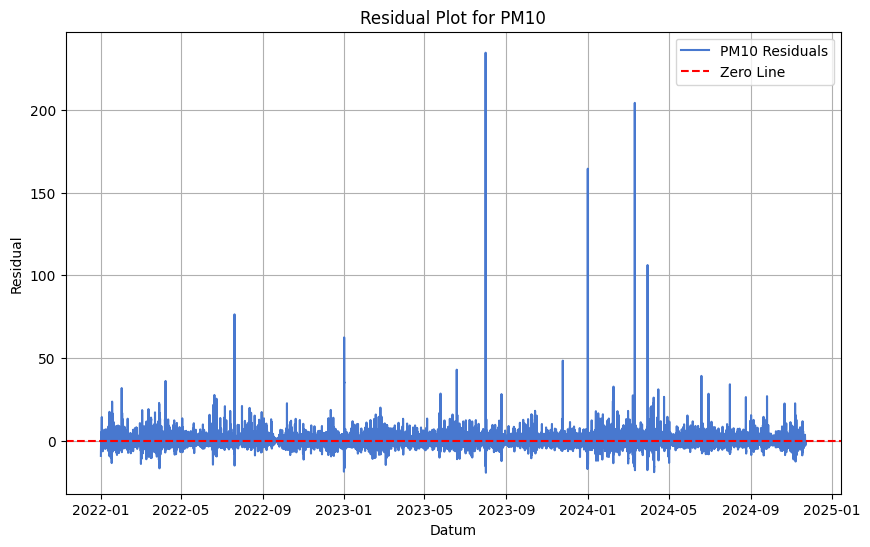

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(residual_data['Datum'], residual_data['PM10_Residual'], label="PM10 Residuals")
plt.axhline(y=0, color='r', linestyle='--', label="Zero Line")
plt.xlabel("Datum")
plt.ylabel("Residual")
plt.title("Residual Plot for PM10")
plt.legend()
plt.grid()
plt.show()

# Dataset gespeichert

In [17]:
# Residual-Daten in eine CSV-Datei speichern
residual_data.to_csv("/Users/rubenstark/Documents/GitHub/Its-Wekk/4 - Data/Final_Data/Cleaned/PM10_Residuals(target).csv", index=False)

print("CSV-Datei erfolgreich gespeichert.")

CSV-Datei erfolgreich gespeichert.


In [27]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Sicherstellen, dass der 'Datum'-Spalte ein datetime-Format hat und als Index gesetzt wird
target_data['Datum'] = pd.to_datetime(target_data['Datum'])
target_data.set_index('Datum', inplace=True)

# Auswahl der Zeitreihe (PM10 Mittelwerte)
series = target_data['PM10 (Stundenmittelwerte)']

# Zeitreihen-Dekomposition durchführen
result = seasonal_decompose(series, model='additive', period=168)  # Period = 168 für Wöchentlich

# Residuen extrahieren
residual = result.resid

# Neues DataFrame mit den Residuen
residual_data_weekly = residual.reset_index()
residual_data_weekly.columns = ['Datum', 'PM10_Residual']

# NaN-Werte entfernen (falls Trend/Saisonalität die ersten/letzten Werte beeinflussen)
residual_data_weekly.dropna(inplace=True)

# Residuen-Dataset anzeigen
print(residual_data_weekly.head())

                 Datum  PM10_Residual
84 2022-01-04 12:00:00      -4.358829
85 2022-01-04 13:00:00      -4.559120
86 2022-01-04 14:00:00      -3.932702
87 2022-01-04 15:00:00      -3.256874
88 2022-01-04 16:00:00      -1.815021


In [28]:
# Residual-Daten in eine CSV-Datei speichern
residual_data_weekly.to_csv("/Users/rubenstark/Documents/GitHub/Its-Wekk/4 - Data/Final_Data/Cleaned/PM10_Residuals_weekly(target).csv", index=False)

print("CSV-Datei erfolgreich gespeichert.")

CSV-Datei erfolgreich gespeichert.
